#Predicting Heart Disease using Machine Learning Methods - Part I. - Exploratory Data Analysis

The following code of this notebook uses various Python-based machine learning and data science libraries to build a classification model in order to predict if a patient has heart disease or not, based on their medical data (various features).

The framework of this project is as follows:
  1. Defining the problem
  2. Looking at the data
  3. Evaluation
  4. Feature selection
  5. Modelling the data
  6. Experimenting to better the model
  7. SWOT Analysis

### 1. Defining the problem


> Given a set of clinical features about a patient, can we successfully predict if they have heart disease or not? If they have heart disease, what type?


###2. Looking at the data


The 'UCI Heart Disease Data' dataset can be found on Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

The original data came from the Cleveland database, from the UCI ML Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

The dataset has the following features (taken from the description on Kaggle):
  - id (Unique id for each patient)
  - age (Age of the patient in years)
  - dataset (place of study)
  - sex (Male/Female)
  - cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
  - trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
  - chol (serum cholesterol in mg/dl)
  - fbs (if fasting blood sugar > 120 mg/dl)
  - restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
  - thalach: maximum heart rate achieved
  - exang: exercise-induced angina (True/ False)
  - oldpeak: ST depression induced by exercise relative to rest
  - slope: the slope of the peak exercise ST segment
  - ca: number of major vessels (0-3) colored by fluoroscopy
  - thal: [normal; fixed defect; reversible defect]
  - num: the predicted attribute

For data analysis and manipulation the following libraries will be used: pandas, numpy, matplotlib and seaborn. For constructing the model I will use scikit-learn.

In [1]:
#EDA and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


###Exploratory Data Analysis

Keeping in mind the following:
1. The problem statement defined.
2. The data we have and how we treat different data types.
3. What is missing and how to deal with missing data?
4. What kind of outliers do we have?
5. How can we add, change and remove features?

In [ ]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

In [ ]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Looking at the different categorical and numerical features to see the number of missing values as well as the distribution of their values. For a more visual analysis I will be plotting the numerical features using green histograms and the categorical features as purple bar charts. For any columns having missing values I excluded them from their respective plots.

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

There are a lot of missing values that need to be handled before fitting a machine learning model.

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
sns.set_style("whitegrid")
#sns.set_palette("Paired")
sns.set_palette("tab20b")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

I will start by looking at the target variable, the one we would like to predict, called 'num'. The 'num' value is more of a category than a numerical feature, since it represents whether a patient has heart disease or not.

In [ ]:
color_0 = palette[2]
color_1 = palette[15]
color_2 = palette[14]
color_3 = palette[13]
color_4 = palette[12]

In [ ]:
df["num"].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

<ipython-input-1054-861e6ae4bdff>:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='grey') for color in custom_colors]


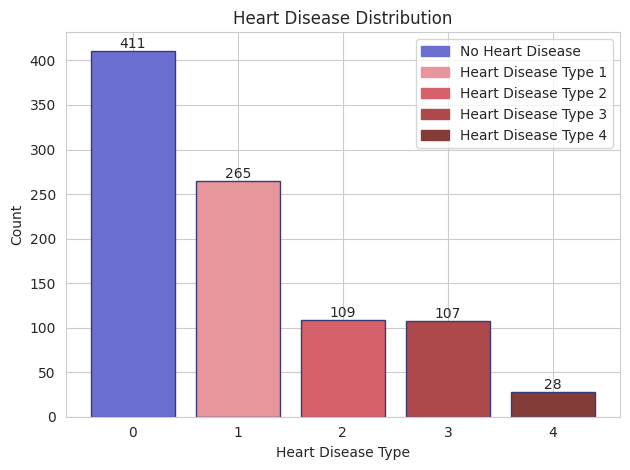

In [ ]:
column_name = 'num'

unique_values = df[column_name].unique()

unique_values_sorted = np.sort(unique_values)

counts = [df[column_name].eq(value).sum() for value in unique_values_sorted]

custom_colors = [color_0, color_1, color_2, color_3, color_4]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values_sorted))

bars = ax.bar(bar_positions, counts, color=custom_colors, edgecolor=palette[0])

ax.set_xlabel('Heart Disease Type')
ax.set_ylabel('Count')
ax.set_title(f'Heart Disease Distribution')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values_sorted)

legend_labels = {
    0: 'No Heart Disease',
    1: 'Heart Disease Type 1',
    2: 'Heart Disease Type 2',
    3: 'Heart Disease Type 3',
    4: 'Heart Disease Type 4',
}

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='grey') for color in custom_colors]
ax.legend(legend_handles, [legend_labels[value] for value in unique_values_sorted], loc='upper right')
plt.tight_layout()
plt.savefig(f"{column_name.lower()}.jpg")


Most of the patients in the dataset are healthy. There is a clear imbalance between the different types of heart diseases, which could negatively impact the predictive power of the classifier.

The problem we're trying to solve is a multi-class classification, since the possible values for the target feature are either 0, 1, 2, 3 or 4, 0 being no heart disease, whilst the rest are various types of heart disease.

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
#sns.set_palette("tab20b")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

In [ ]:
selected_color = palette[2]
accent_color = palette[3]
mean_color = palette[5]

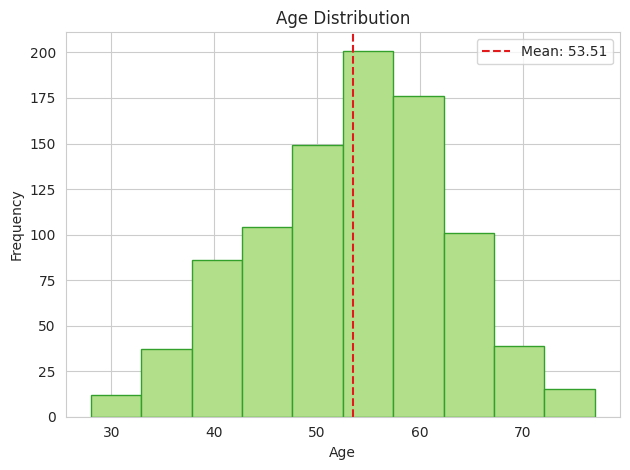

In [ ]:
average_age = df["age"].mean()

fig, ax = plt.subplots()
ax.hist(df["age"], color=selected_color, edgecolor=accent_color)

ax.axvline(x=average_age, color=mean_color, linestyle='--', label=f'Mean: {average_age:.2f}')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution')
ax.legend()

plt.tight_layout()

fig.savefig("age.jpg")

The average patient is about 53.51 years old, the distribution of patient ages is approximately normal.

In [ ]:
selected_color = palette[8]
accent_color = palette[9]
mean_color = palette[5]

In [ ]:
df["sex"].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [ ]:
male_count = (df['sex'] == "Male").sum()
male_count

726

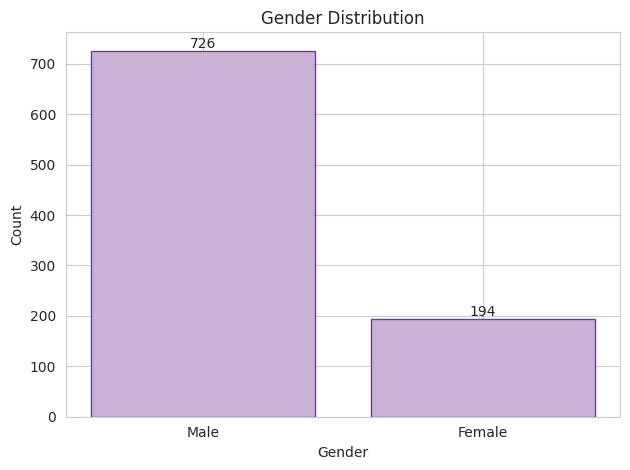

In [ ]:
male_count = (df['sex'] == "Male").sum()
female_count = (df['sex'] == "Female").sum()

gender_counts = [male_count, female_count]

fig, ax = plt.subplots()

bar_positions = range(len(gender_counts))

bars = ax.bar(bar_positions, gender_counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')

for bar, count in zip(bars, gender_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.savefig("gender.jpg")

Most of the patients are male. This imbalance could impact the model's predictive power as it could have trouble diagnosing female patients.

In [ ]:
df["dataset"].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

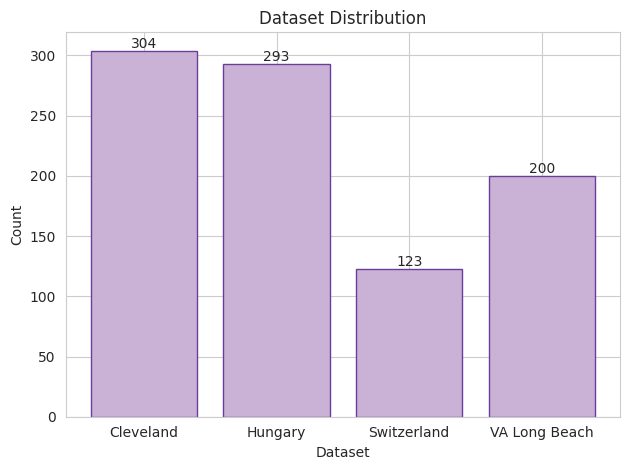

In [ ]:
column_name = 'dataset'

unique_values = df[column_name].unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel(column_name.capitalize())
ax.set_ylabel('Count')
ax.set_title(f'Dataset Distribution')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}.jpg")

An overwhelming majority of the data is from the Cleveland and Hungary datasets.

In [ ]:
df["cp"].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

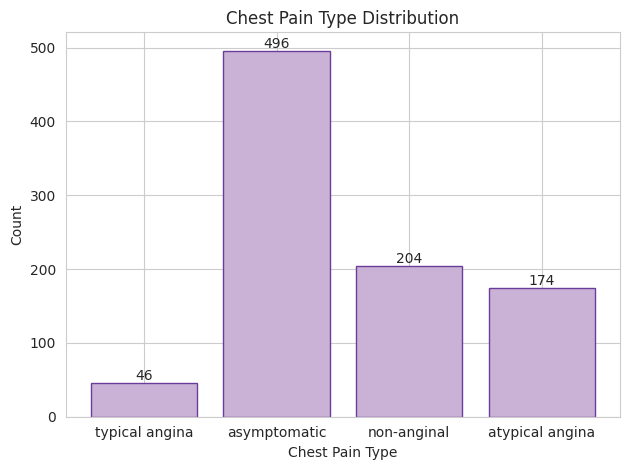

In [ ]:
column_name = 'cp'

unique_values = df[column_name].unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Count')
ax.set_title(f'Chest Pain Type Distribution')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}.jpg")

Most of the patients in this dataset have no sign of heart disease (refering to the heart disease features dictionary).

In [ ]:
selected_color = palette[2]
accent_color = palette[3]
mean_color = palette[5]

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

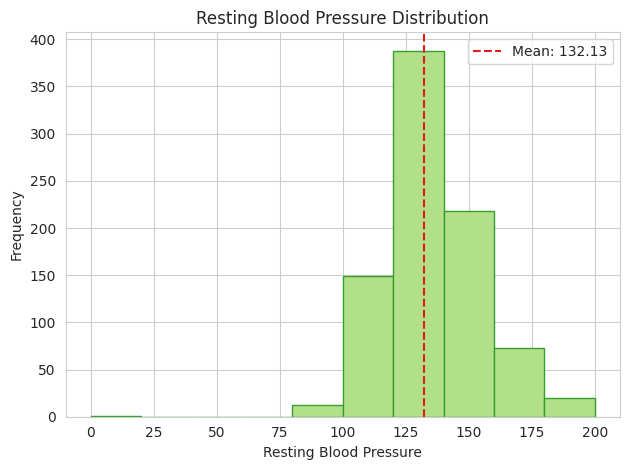

In [ ]:
average_trestbps = df["trestbps"].mean()

fig, ax = plt.subplots()
ax.hist(df["trestbps"], color=selected_color, edgecolor=accent_color)

ax.axvline(x=average_trestbps, color=mean_color, linestyle='--', label=f'Mean: {average_trestbps:.2f}')

ax.set_xlabel('Resting Blood Pressure')
ax.set_ylabel('Frequency')
ax.set_title('Resting Blood Pressure Distribution')
ax.legend()

plt.tight_layout()

fig.savefig("trestbps.jpg")

When it comes to resting blood pressure the average value is approximately 132.13. There seems to be an outlier, a patient who's trestbps is lower than 25. Patients with a resting blood pressure of over 130-140 have high blood pressure and are susceptive to of disease (heart disease features dictionary).

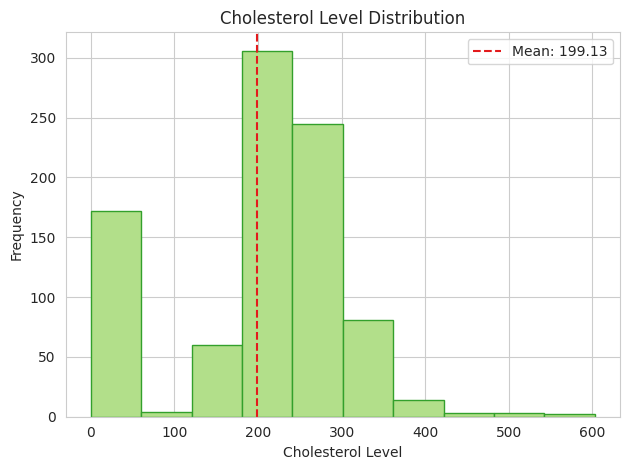

In [ ]:
average_chol = df["chol"].mean()

fig, ax = plt.subplots()
ax.hist(df["chol"], color=selected_color, edgecolor=accent_color)

ax.axvline(x=average_chol, color=mean_color, linestyle='--', label=f'Mean: {average_chol:.2f}')

ax.set_xlabel('Cholesterol Level')
ax.set_ylabel('Frequency')
ax.set_title('Cholesterol Level Distribution')
ax.legend()

plt.tight_layout()

fig.savefig("chol.jpg")

The cholesterol level has an average of approximately 199.13. A cholesterol level of above 200 is a cause for concern (heart disease features dictionary).

In [ ]:
selected_color = palette[8]
accent_color = palette[9]
mean_color = palette[5]

In [ ]:
df["fbs"].value_counts()

False    692
True     138
Name: fbs, dtype: int64

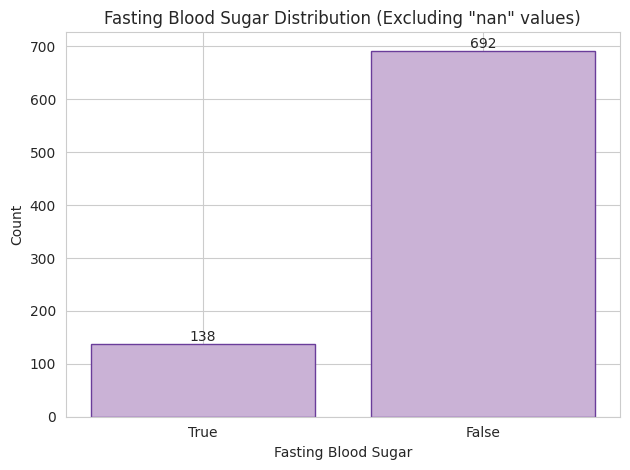

In [ ]:
column_name = 'fbs'

#Excluding 'nan' values
unique_values = df[column_name].dropna().unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Fasting Blood Sugar')
ax.set_ylabel('Count')
ax.set_title(f'Fasting Blood Sugar Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg")

Most patients have a fasting blood sugar that is under 120 mg/dl, meaning that they are most likely healthy. A blood sugar level of over 126 mg/dl signals diabetes (heart disease features dictionary).

In [ ]:
df["restecg"].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

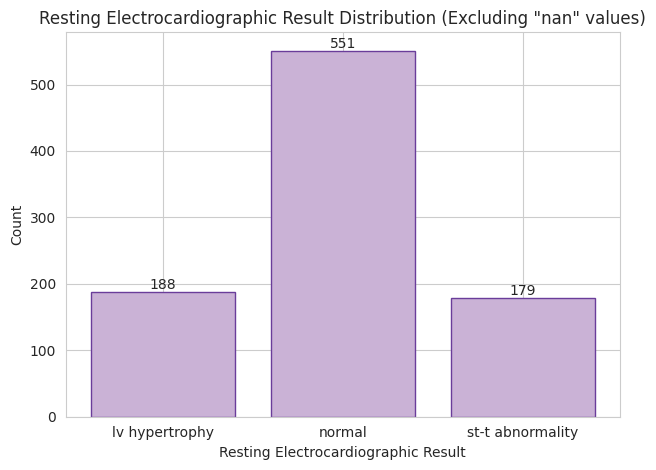

In [ ]:
column_name = 'restecg'

#Excluding 'nan' values
unique_values = df[column_name].dropna().unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Resting Electrocardiographic Result')
ax.set_ylabel('Count')
ax.set_title(f'Resting Electrocardiographic Result Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg")

Most patients have normal resting electrocardiographic results, the other two values signal abnormality in heart beat (heart disease features dictionary).

In [ ]:
selected_color = palette[2]
accent_color = palette[3]
mean_color = palette[5]

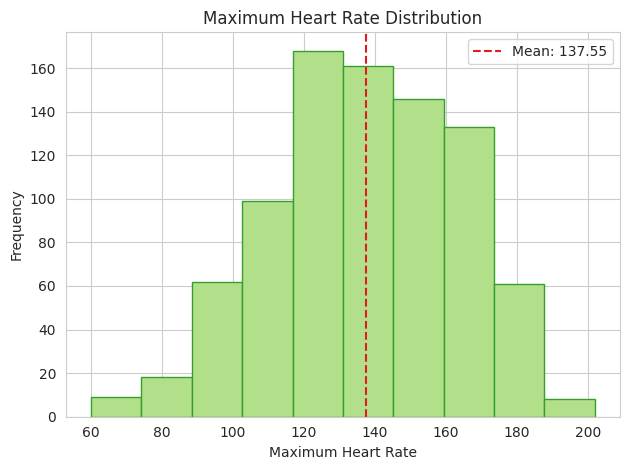

In [ ]:
average_thalch = df["thalch"].mean()

fig, ax = plt.subplots()
ax.hist(df["thalch"], color=selected_color, edgecolor=accent_color)

ax.axvline(x=average_thalch, color=mean_color, linestyle='--', label=f'Mean: {average_thalch:.2f}')

ax.set_xlabel('Maximum Heart Rate')
ax.set_ylabel('Frequency')
ax.set_title('Maximum Heart Rate Distribution')
ax.legend()

plt.tight_layout()

fig.savefig("thalch.jpg")

The average patient has a maximum heart rate of approximately 137.55.

In [ ]:
selected_color = palette[8]
accent_color = palette[9]
mean_color = palette[5]

In [ ]:
df["exang"].value_counts()

False    528
True     337
Name: exang, dtype: int64

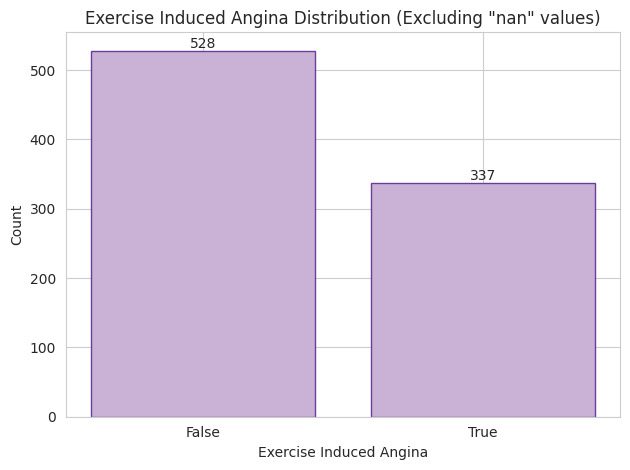

In [ ]:
column_name = 'exang'

#Excluding 'nan' values
unique_values = df[column_name].dropna().unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Exercise Induced Angina')
ax.set_ylabel('Count')
ax.set_title(f'Exercise Induced Angina Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg")

Most patients do not have exercise induced angina, meaning there is no burning, pressure or aching in the chest/neck/jaw or shoulder area in time of exercise (Reference: https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments#:~:text=Angina%20tends%20to%20appear%20during,and%20even%20down%20the%20arm).

In [ ]:
selected_color = palette[2]
accent_color = palette[3]
mean_color = palette[5]

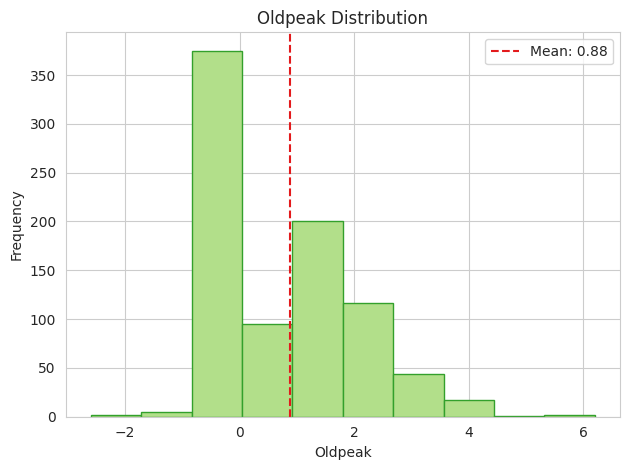

In [ ]:
average_oldpeak = df["oldpeak"].mean()

fig, ax = plt.subplots()
ax.hist(df["oldpeak"], color=selected_color, edgecolor=accent_color)

ax.axvline(x=average_oldpeak, color=mean_color, linestyle='--', label=f'Mean: {average_oldpeak:.2f}')

ax.set_xlabel('Oldpeak')
ax.set_ylabel('Frequency')
ax.set_title('Oldpeak Distribution')
ax.legend()

plt.tight_layout()

fig.savefig("oldpeak.jpg")

The average of oldpeak is approximately 0.88. Oldpeak is the stress of heart during excercise, meaning that most patients are also free of this symptom.

In [ ]:
selected_color = palette[8]
accent_color = palette[9]
mean_color = palette[5]

In [ ]:
df["slope"].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

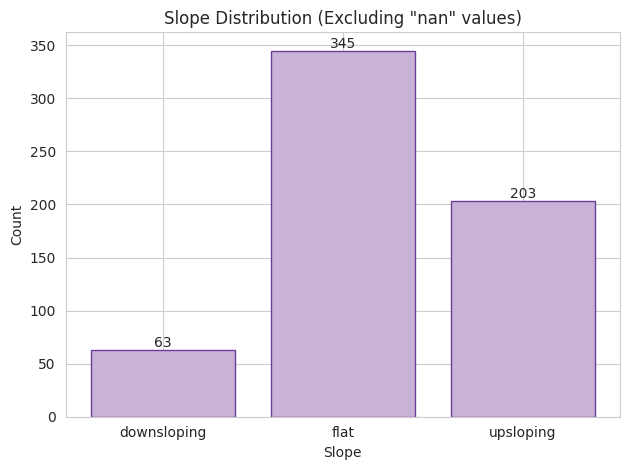

In [ ]:
column_name = 'slope'

#Excluding 'nan' values
unique_values = df[column_name].dropna().unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel(column_name.capitalize())
ax.set_ylabel('Count')
ax.set_title(f'Slope Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg")

Most patients have a flat slope, meaning that the heart is typically healthy, whilst a downslope means signs of an unhealthy heart (heart disease features dictionary).

Although 'ca' (number of major vessels) is a numerical value it is more so a category.

In [ ]:
df["ca"].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

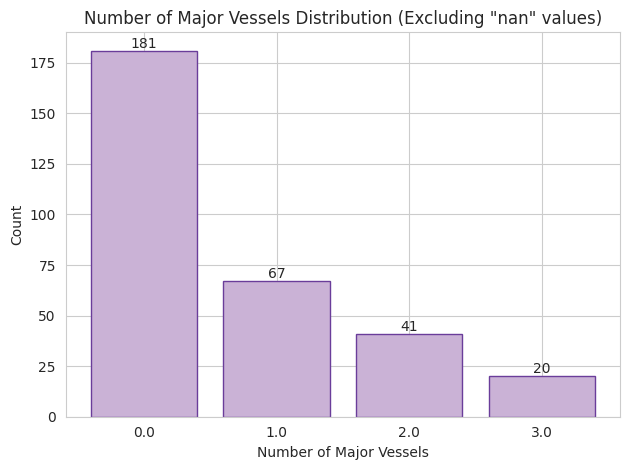

In [ ]:
column_name = 'ca'

unique_values = df[column_name].dropna().unique()

unique_values_sorted = sorted(unique_values)

counts = [df[column_name].eq(value).sum() for value in unique_values_sorted]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values_sorted))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Number of Major Vessels')
ax.set_ylabel('Count')
ax.set_title(f'Number of Major Vessels Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values_sorted)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg");

Most patients number of major vessels are 0. The vessels are colored by fluoroscopy, and the colored vessel is easier to monitor, the more vessels we see the better the blood flow. The more blood movement, the better. In this case the data seems to contradict that most patients are healthy.

In [ ]:
df["thal"].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

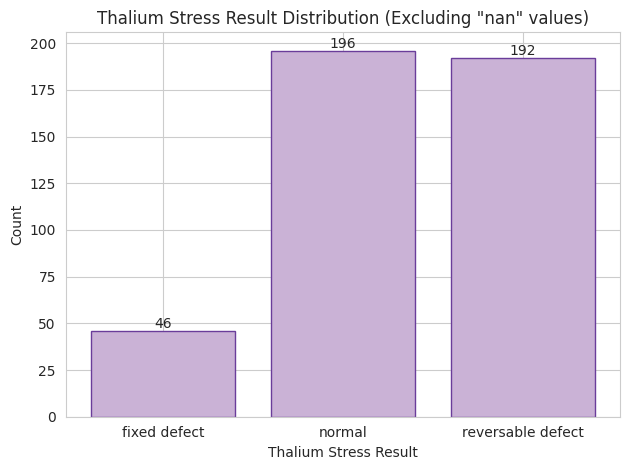

In [ ]:
column_name = 'thal'

#Excluding 'nan' values
unique_values = df[column_name].dropna().unique()

counts = [df[column_name].eq(value).sum() for value in unique_values]

fig, ax = plt.subplots()

bar_positions = range(len(unique_values))

bars = ax.bar(bar_positions, counts, color=selected_color, edgecolor=accent_color)

ax.set_xlabel('Thalium Stress Result')
ax.set_ylabel('Count')
ax.set_title(f'Thalium Stress Result Distribution (Excluding "nan" values)')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)),
            ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(unique_values)

plt.tight_layout()
plt.savefig(f"{column_name.lower()}_excluding_nan.jpg")

Most patients have either normal or reversable defect thalium stress results, meaning they're most likely healthy, since fixed defect refers to a defect that is cured (heart disease features dictionary).

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Multivariate Comparison Analysis of Numerical and Categorical Variables


In [ ]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")
#sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

male_color = palette[6]
female_color = palette[18]

In [ ]:
pd.crosstab(df['num'], df['sex'])

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


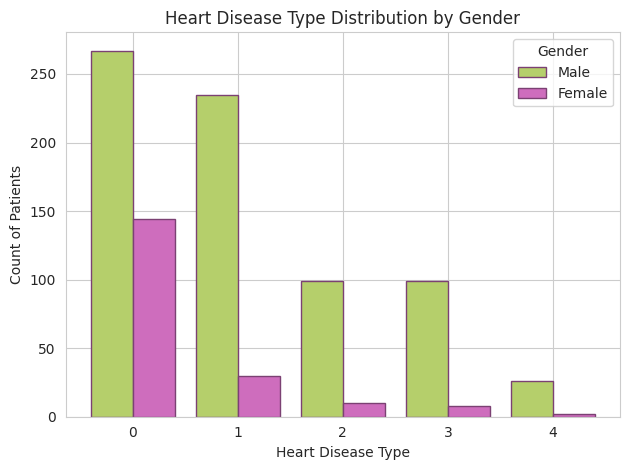

In [ ]:
cross_tab = pd.crosstab(df['num'], df['sex'])

plt.figure()

bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['Male'], width=0.4, label='Male', color=male_color, edgecolor=palette[16])
plt.bar([pos + 0.4 for pos in bar_positions], cross_tab['Female'], width=0.4, label='Female', color=female_color, edgecolor=palette[16])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Gender')

plt.xticks([pos + 0.2 for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Gender")

plt.tight_layout()
plt.savefig("heart_disease_type_by_gender.jpg")

From the plot above it seems that men are more likely to have all 4 types of heart disease, although it is important to note that there are way more male patients than female and the number of healthy male-patients is also higher.

In [ ]:
df["cp"].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
color_ta = palette[19]
color_aa = palette[18]
color_na = palette[17]
color_a = palette[16]

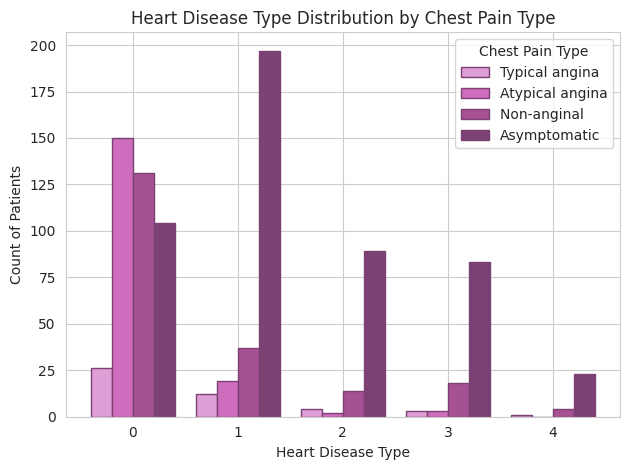

In [ ]:
cross_tab = pd.crosstab(df['num'], df['cp'])

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['typical angina'], width=bar_width, label='Typical angina', color=color_ta, edgecolor=palette[16])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['atypical angina'], width=bar_width, label='Atypical angina', color=color_aa, edgecolor=palette[16])
plt.bar([pos + 2*bar_width for pos in bar_positions], cross_tab['non-anginal'], width=bar_width, label='Non-anginal ', color=color_na, edgecolor=palette[16])
plt.bar([pos + 3*bar_width for pos in bar_positions], cross_tab['asymptomatic'], width=bar_width, label='Asymptomatic', color=color_a, edgecolor=palette[16])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Chest Pain Type')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Chest Pain Type")

plt.tight_layout()
plt.savefig("heart_disease_type_by_cp.jpg")

Looking at the plot above for all types of heart diseases, especially for type 1, most patients seem to experience chest pain with no signs of disease.

In [ ]:
df["restecg"].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [ ]:
color_norm = palette[3]
color_lv_h = palette[2]
color_st_t_ab = palette[1]

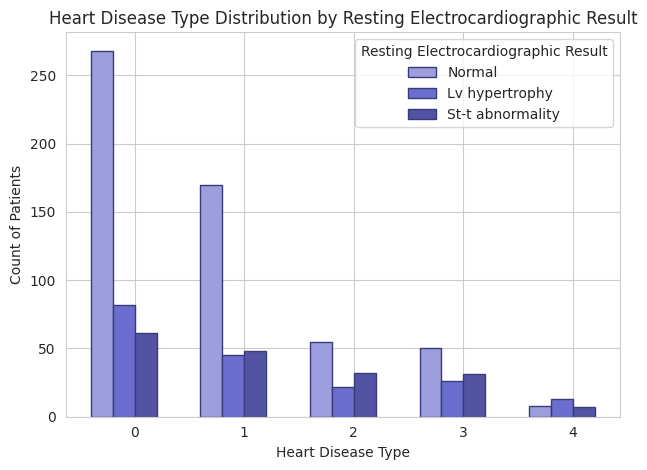

In [ ]:
cross_tab = pd.crosstab(df['num'], df['restecg'])

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['normal'], width=bar_width, label='Normal', color=color_norm, edgecolor=palette[0])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['lv hypertrophy'], width=bar_width, label='Lv hypertrophy', color=color_lv_h, edgecolor=palette[0])
plt.bar([pos + 2*bar_width for pos in bar_positions], cross_tab['st-t abnormality'], width=bar_width, label='St-t abnormality', color=color_st_t_ab, edgecolor=palette[0])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Resting Electrocardiographic Result')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Resting Electrocardiographic Result")

plt.tight_layout()
plt.savefig("heart_disease_type_by_resting_electrocardiographic_result.jpg")

When it comes to the resting electrocardiographic results, type 1, 2 and 3 patients mostly have normal results, for type 4 patients lv hypertrophy (enlarged heart's main pumping chamber) is most common, meaning that this could be considered a cause of concern for this type. It is also important to note that healthy patients also experience abnormalities, and that all types have all kinds of results so it is not definitive to say that a result means a disease.

In [ ]:
df["slope"].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [ ]:
color_fl = palette[5]
color_up = palette[6]
color_down = palette[7]

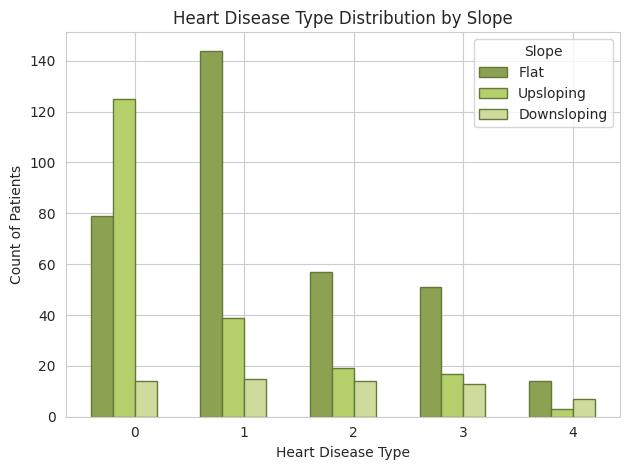

In [ ]:
cross_tab = pd.crosstab(df['num'], df['slope'])

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['flat'], width=bar_width, label='Flat', color=color_fl, edgecolor=palette[4])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['upsloping'], width=bar_width, label='Upsloping', color=color_up, edgecolor=palette[4])
plt.bar([pos + 2*bar_width for pos in bar_positions], cross_tab['downsloping'], width=bar_width, label='Downsloping', color=color_down, edgecolor=palette[4])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Slope')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Slope")

plt.tight_layout()
plt.savefig("heart_disease_type_by_slope.jpg")

When it comes to healthy patients, the most common slope is upsloping, which is considered rare. Upsloping means better heart rate with exercise (heart disease dictionary). This alone could be an interesting research topic. When it comes to the diagnosed patients, a healthy heart is most common in terms of slope.

In [ ]:
df["thal"].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
color_no = palette[11]
color_rev = palette[10]
color_fix = palette[9]

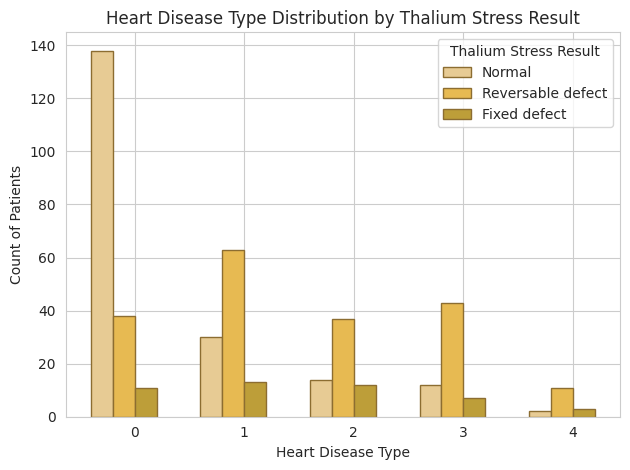

In [ ]:
cross_tab = pd.crosstab(df['num'], df['thal'])

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['normal'], width=bar_width, label='Normal', color=color_no, edgecolor=palette[8])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['reversable defect'], width=bar_width, label='Reversable defect', color=color_rev, edgecolor=palette[8])
plt.bar([pos + 2*bar_width for pos in bar_positions], cross_tab['fixed defect'], width=bar_width, label='Fixed defect', color=color_fix, edgecolor=palette[8])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Thalium Stress Result')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Thalium Stress Result")

plt.tight_layout()
plt.savefig("heart_disease_type_by_thalium_stress_result.jpg")

When it comes to healthy patients the thalium stress results are mostly normal but for all types of heart disease a reversable defect is most common.

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
df["fbs"].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [ ]:
palette = sns.color_palette()

color_true = palette[6]
color_false = palette[14]

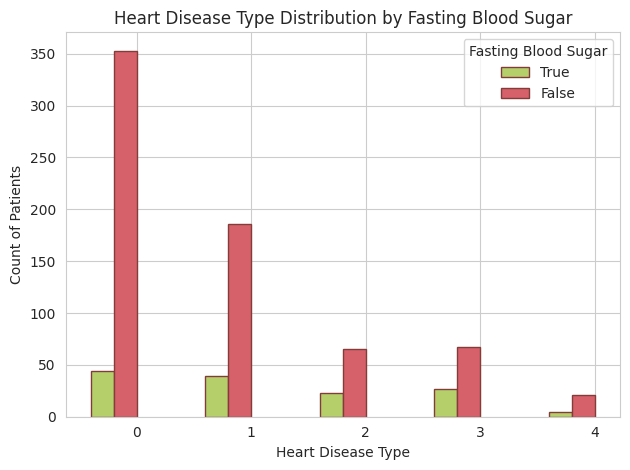

In [ ]:
cross_tab = pd.crosstab(df['num'], df['fbs'].astype(str))

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['True'], width=bar_width, label='True', color=color_true, edgecolor=palette[12])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['False'], width=bar_width, label='False', color=color_false, edgecolor=palette[12])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Fasting Blood Sugar')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title='Fasting Blood Sugar')

plt.tight_layout()
plt.savefig("heart_disease_type_by_fbs.jpg")

For every category, most commonly patients have a healthy fasting blood sugar.

In [ ]:
df["exang"].value_counts()

False    528
True     337
Name: exang, dtype: int64

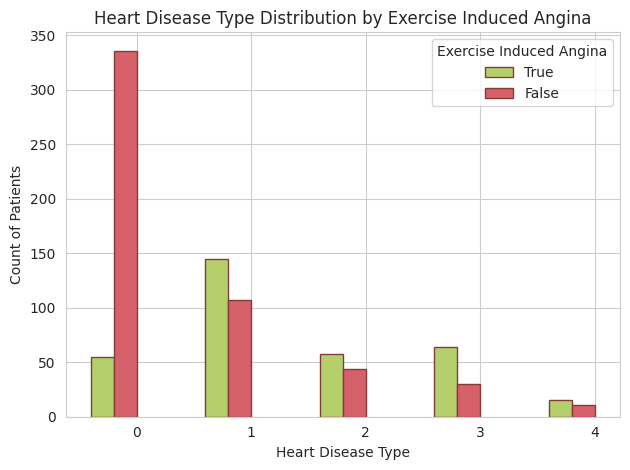

In [ ]:
cross_tab = pd.crosstab(df['num'], df['exang'].astype(str))

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab['True'], width=bar_width, label='True', color=color_true, edgecolor=palette[12])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab['False'], width=bar_width, label='False', color=color_false, edgecolor=palette[12])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Exercise Induced Angina')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title='Exercise Induced Angina')

plt.tight_layout()
plt.savefig("heart_disease_type_by_exang.jpg")

When it comes to healthy patients they don't commonly experience exercise induced angina, but it is common for all heart  diseases to more often than not have this heart concern.

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
color_00 = palette[15]
color_01 = palette[14]
color_02 = palette[13]
color_03 = palette[12]

In [ ]:
df["ca"].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

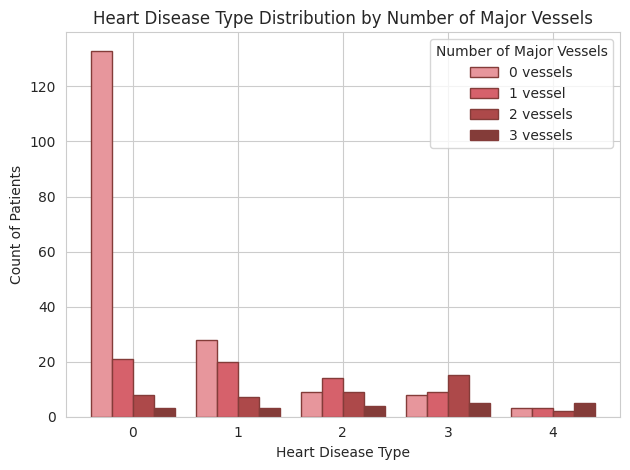

In [ ]:
cross_tab = pd.crosstab(df['num'], df['ca'].astype(str))

plt.figure()

bar_width = 0.2
bar_positions = range(len(cross_tab))

plt.bar(bar_positions, cross_tab["0.0"], width=bar_width, label='0 vessels', color=color_00, edgecolor=palette[12])
plt.bar([pos + bar_width for pos in bar_positions], cross_tab["1.0"], width=bar_width, label='1 vessel', color=color_01, edgecolor=palette[12])
plt.bar([pos + 2*bar_width for pos in bar_positions], cross_tab["2.0"], width=bar_width, label='2 vessels', color=color_02, edgecolor=palette[12])
plt.bar([pos + 3*bar_width for pos in bar_positions], cross_tab["3.0"], width=bar_width, label='3 vessels', color=color_03, edgecolor=palette[12])

plt.xlabel('Heart Disease Type')
plt.ylabel('Count of Patients')
plt.title('Heart Disease Type Distribution by Number of Major Vessels')

plt.xticks([pos + 1.5*bar_width for pos in bar_positions], [str(index) for index in cross_tab.index])

plt.legend(title="Number of Major Vessels")

plt.tight_layout()
plt.savefig("heart_disease_type_by_ca.jpg")

Interestingly, the more severe the heart disease is, the more vessels can be identified, which is unusual since the healthier the patient, the better the blood flow and the more vessels to be identified.

In [4]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")

In [5]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [6]:
palette = sns.color_palette()

selected_color = palette[18]
accent_color = palette[16]

In [7]:
df["age"].max()

77

In [8]:
df["age"].min()

28

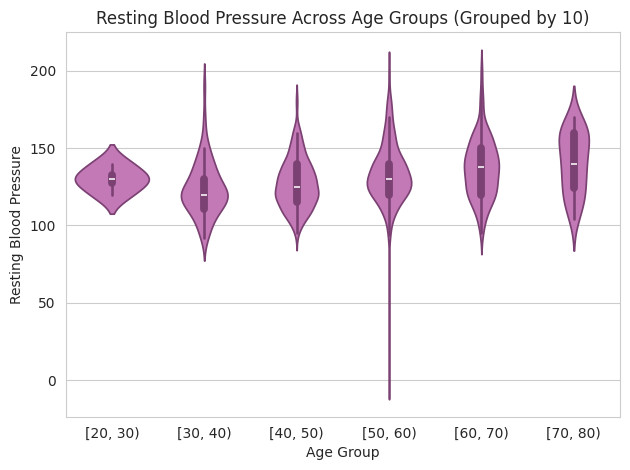

In [10]:
categorical_variable = 'age'
numerical_variable = 'trestbps'

df['age_group'] = pd.cut(df[categorical_variable], bins=range(20, 81, 10), right=False)

melted_df = pd.melt(df, id_vars=['age_group'], value_vars=[numerical_variable], var_name='Subject', value_name='Value')

plt.figure()

ax = sns.violinplot(x='age_group', y='Value', data=melted_df, color=selected_color, edgecolor=accent_color)

plt.title('Resting Blood Pressure Across Age Groups (Grouped by 10)')
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure')

plt.tight_layout()
plt.savefig("resting_blood_pressure_by_age_group.jpg")

There seem to be a lot of extreme cases when it comes to the age groups of 30s and 50s, meaning that there could be patients with heart diseases, since having such a high resting blood pressure is a cause for concern. The median resting blood pressure seems to increase by age (not accounting the 20s group).

There seems to be an extreme case of a patient from the [50, 60) group that seems to have a blood pressure of 0. That must be a mistake as according to the NHS the following are the general values for blood pressure:
* ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg
* high blood pressure is considered to be 140/90mmHg or higher
* low blood pressure is considered to be below 90/60mmHg
(Reference: https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/#:~:text=ideal%20blood%20pressure%20is%20considered,to%20be%20below%2090%2F60mmHg)

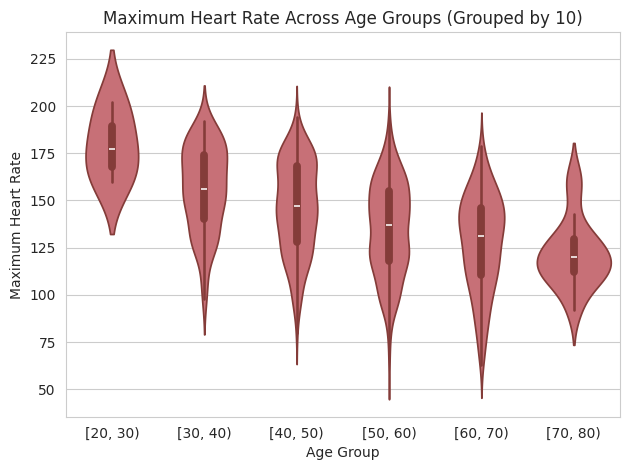

In [ ]:
categorical_variable = 'age'
numerical_variable = 'thalch'

#Group ages by 10
df['age_group'] = pd.cut(df[categorical_variable], bins=range(20, 81, 10), right=False)

melted_df = pd.melt(df, id_vars=['age_group'], value_vars=[numerical_variable], var_name='Subject', value_name='Value')

plt.figure()

ax = sns.violinplot(x='age_group', y='Value', data=melted_df, color=selected_color, edgecolor=accent_color)

plt.title('Maximum Heart Rate Across Age Groups (Grouped by 10)')
plt.xlabel('Age Group')
plt.ylabel('Maximum Heart Rate')

plt.tight_layout()
plt.savefig("maximum_heart_rate_by_age_group.jpg")

The maximum heart rate seems to lower by age group, the highest median maximum heart rate and maximum heart rate interval (interquartile range, 25%-75% of data) of values is represented by the patients from the [20, 30) range, whilst the lowest are the oldest patients in the [70, 80) range.

In [ ]:
 df[df['age'] < 30]["oldpeak"]

132    0.0
303    0.0
304    0.0
305    0.0
Name: oldpeak, dtype: float64

We can conclude that the oldpeak is not really measured for the patients under 30, therefore I will exclude that group from the plot as the value for each patient under 30 is 0.0, meaning no stress of heart during exercise.

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

selected_color = palette[10]
accent_color = palette[8]

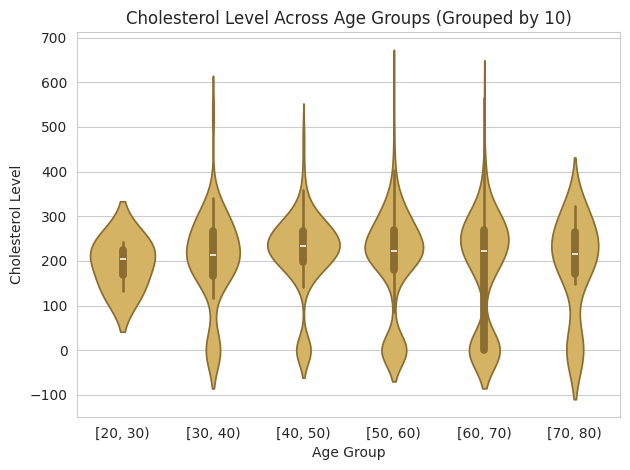

In [ ]:
categorical_variable = 'age'
numerical_variable = 'chol'

#Group ages by 10
df['age_group'] = pd.cut(df[categorical_variable], bins=range(20, 81, 10), right=False)

melted_df = pd.melt(df, id_vars=['age_group'], value_vars=[numerical_variable], var_name='Subject', value_name='Value')

plt.figure()

ax = sns.violinplot(x='age_group', y='Value', data=melted_df, color=selected_color, edgecolor=accent_color)

plt.title('Cholesterol Level Across Age Groups (Grouped by 10)')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Level')

plt.tight_layout()
plt.savefig("chol_by_age_group.jpg")

When it comes to patients cholesterol levels, there seem to be a lot of extremely high values for patients in their 30s, 40s, 50s and 60s.

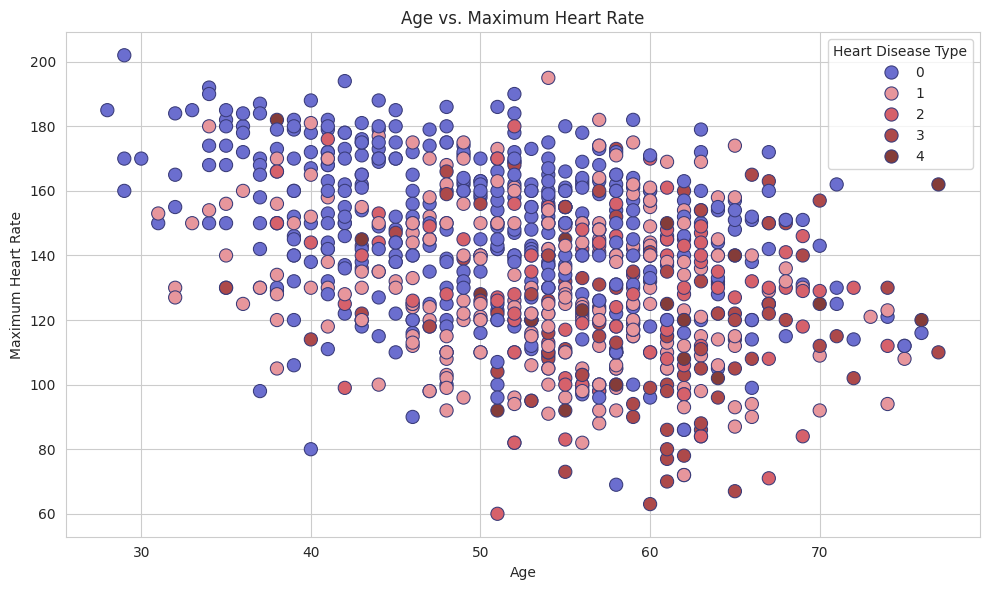

In [ ]:
fill_palette = {0: palette[2], 1: palette[15], 2: palette[14], 3: palette[13], 4: palette[12]}

df_filtered = df[(df['age'] != 0) & (df['thalch'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalch', hue='num', s=90, palette=fill_palette, data=df_filtered, edgecolor=palette[0])

plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

plt.legend(title='Heart Disease Type', loc='upper right')
plt.tight_layout()
plt.savefig("age_vs_resting_thalch.jpg")

Looking at this plot, most of the healthy patients have a higher max heart rate than the ones diagnosed with any of the heart disease types, when it comes to all age groups on average. The diseased patients seem to have lower heart rates, especially the 50s, 60s and 70s age groups. Generally, maximum heart rate varies and all kinds of values are found in all types (0-4) of patients.

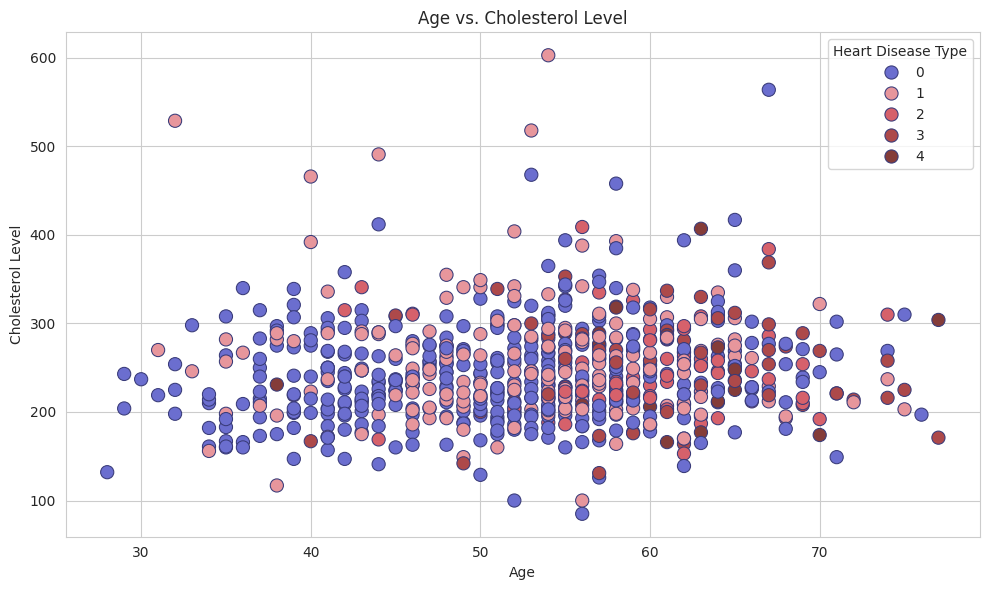

In [ ]:
fill_palette = {0: palette[2], 1: palette[15], 2: palette[14], 3: palette[13], 4: palette[12]}

df_filtered = df[(df['age'] != 0) & (df['chol'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='num', s=90, palette=fill_palette, data=df_filtered, edgecolor=palette[0])

plt.title('Age vs. Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')

plt.legend(title='Heart Disease Type', loc='upper right')
plt.tight_layout()
plt.savefig("age_vs_chol.jpg")

When it comes to cholesterol levels, the 30s and 40s are mostly healthy, with a lower cholesterol level, but as the ages increase the types of heart disease is all the more common and severe. The cholestreol level seems to be between 100-400 for most patients. There are a lot more patients with heart disease over a cholesterol level of 200 between the 50s and 70s age groups.

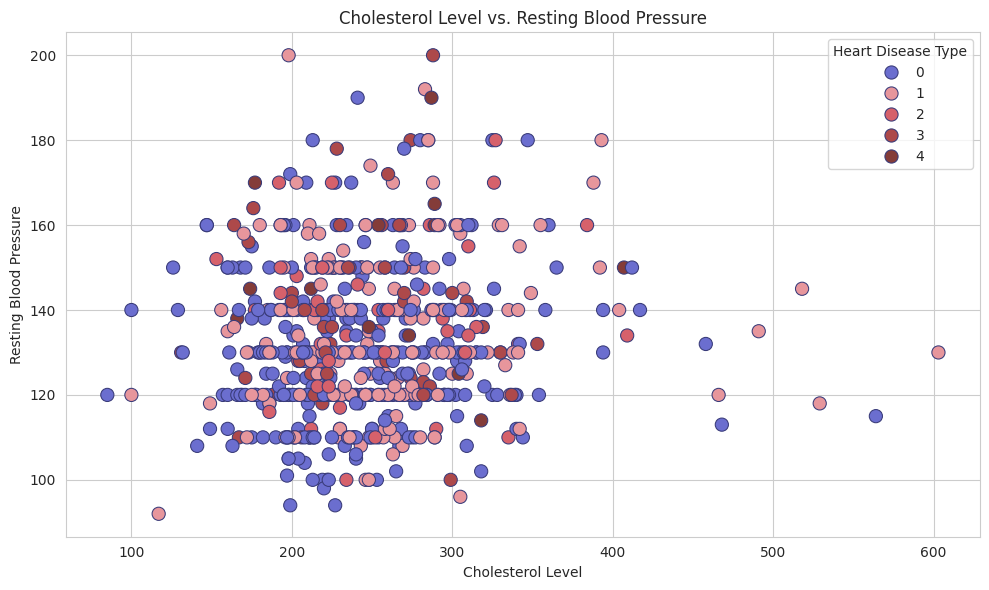

In [ ]:
fill_palette = {0: palette[2], 1: palette[15], 2: palette[14], 3: palette[13], 4: palette[12]}

df_filtered = df[(df['chol'] != 0) & (df['trestbps'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='trestbps', hue='num', s=90, palette=fill_palette, data=df_filtered, edgecolor=palette[0])

plt.title('Cholesterol Level vs. Resting Blood Pressure')
plt.xlabel('Cholesterol Level')
plt.ylabel('Resting Blood Pressure')

plt.legend(title='Heart Disease Type', loc='upper right')
plt.tight_layout()
plt.savefig("chol_level_vs_resting_blood_pressure_by_num.jpg")

As the cholesterol level and resting blood pressure increase there are commonly more patients with various types of heart disease, the severity also increases.

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

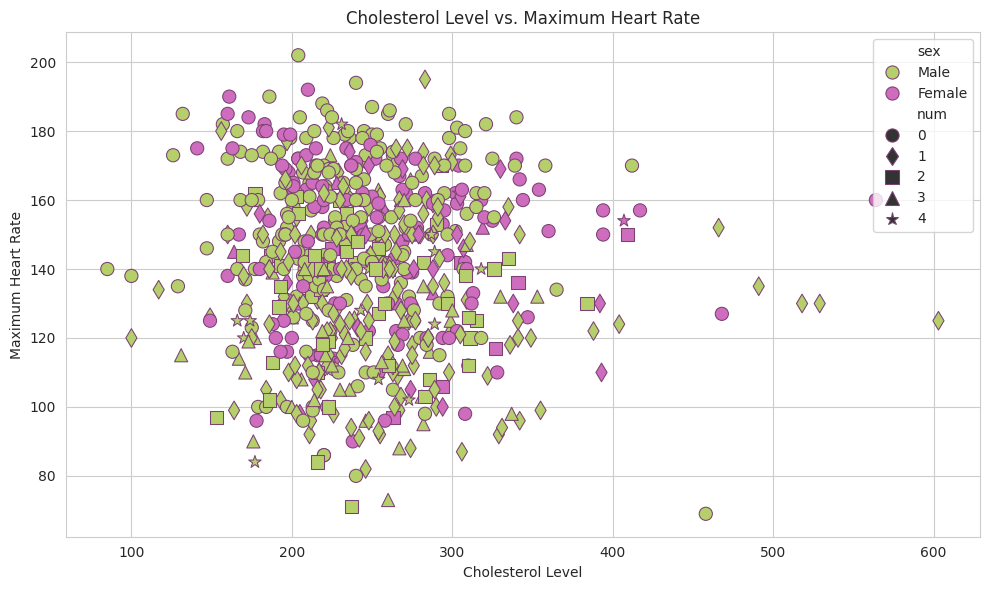

In [ ]:
fill_palette = {"Male": palette[6], "Female": palette[18]}

df_filtered = df[(df['chol'] != 0) & (df['thalch'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalch', hue='sex', style='num', palette=fill_palette, markers=["o", "d", "s", "^", "*"], s=90, data=df_filtered, edgecolor=palette[16])

plt.title('Cholesterol Level vs. Maximum Heart Rate')
plt.xlabel('Cholesterol Level')
plt.ylabel('Maximum Heart Rate')

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("chol_level_vs_maximum_heart_rate_by_gender_and_num.jpg")

There are far more male patients in this dataset so it is hard to say if the gender could influence heart disease or not. There are also various types of heart disease for each maximum heart rate and cholesterol level. More female patients have higher maximum heart rates.

###Correlation Analysis of Numerical Features

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")
#sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

<ipython-input-1145-6a6b65372492>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop("id", axis=1).corr()


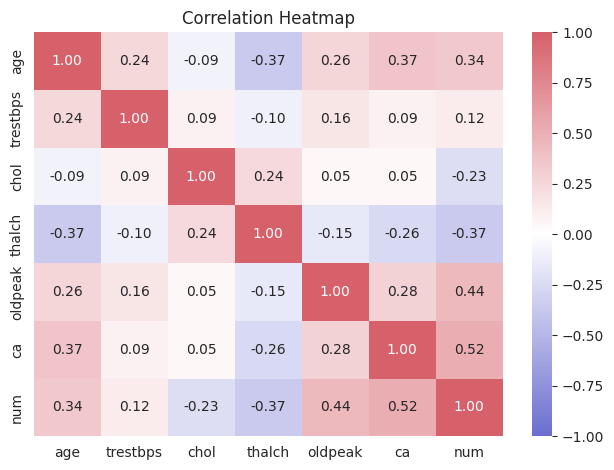

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
color_list = [palette[2], '#FFFFFF', palette[14]]  # blue, white, red for -1, 0, 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', color_list, N=256)

correlation_matrix = df.drop("id", axis=1).corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.savefig("correlation_heatmap.jpg")

There seems to not be any strong postitive or strong negative correlation between any of the numerical features and the target variable. All the correlation coefficient values are below 0.6 for the positive correlations and above -0.6. for the negative correlations.

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,"[60, 70)"
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,"[60, 70)"
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,"[60, 70)"
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,"[30, 40)"
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,"[40, 50)"


###  3. Defining the evaluation metric


>The project is worth pursuing if we are able to reach 95% accuracy at predicting whether a patient has heart disease or not.

### 4. Selecting features to focus on


Creating a data dictionary:
  - id (Unique id for each patient)
  - age (Age of the patient in years)
  - dataset (place of study)
  - sex (Male/Female)
  - cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
  - trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    * anything above 130-140 is typically cause for concern
  - chol (serum cholesterol in mg/dl)
    * above 200 is cause for concern
  - fbs (if fasting blood sugar > 120 mg/dl)
    * '>126' mg/dL signals diabetes
  - restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber
  - thalach: maximum heart rate achieved
  - exang: exercise-induced angina (True/ False)
  - oldpeak: ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise, unhealthy heart will stress more
  - slope: the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
  - ca: number of major vessels (0-3) colored by fluoroscopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
  - thal: [normal; fixed defect; reversible defect]
    * 1, 3: normal
    * 6: fixed defect: used to have defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
  - num: the predicted attribute (0 - healthy; 1, 2, 3, 4 - types of heart disease)